- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
import pandas as pd
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

from functions import *
from preprocess_NLP import *
from os import listdir
from os.path import isfile, join

# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# import spacy

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ### WARNINGS !!
from PIL import Image

# import plotly as px

from pandarallel import pandarallel

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"

## Part I : Exploratory Data Analysis

In [3]:
data_text = pd.read_csv(input_file)

In [4]:
data_text.head()

,text,category,target
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [5]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      1050 non-null   object
 1   category  1050 non-null   object
 2   target    1050 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.7+ KB


In [6]:
data_text.isna().sum()

text        0
category    0
target      0
dtype: int64

In [7]:
data_text.isna().mean()

text        0.0
category    0.0
target      0.0
dtype: float64

## Part II : Text processing

##### Downloads and options

In [8]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [9]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [10]:
# init sns
sns.set()

##### Loading data

In [11]:
data_text.head()

,text,category,target
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [12]:
data_text.shape

(1050, 3)

### I) Cleaning the corpus

#### Work on a specific document

In [13]:
# select a random document

doc = data_text.text.sample(1) # get a row
doc = doc.values[0] # get a numpy array
doc

'Buy Handloomhub Polyester Pink Self Design Eyelet Door Curtain at Rs. 973 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!'

##### 1) Lower

In [14]:
doc = doc.lower()
doc

'buy handloomhub polyester pink self design eyelet door curtain at rs. 973 at flipkart.com. only genuine products. free shipping. cash on delivery!'

##### 2) Tokenization

In [15]:
tokens = word_tokenize(doc)
tokens

['buy',
 'handloomhub',
 'polyester',
 'pink',
 'self',
 'design',
 'eyelet',
 'door',
 'curtain',
 'at',
 'rs',
 '.',
 '973',
 'at',
 'flipkart.com',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 'free',
 'shipping',
 '.',
 'cash',
 'on',
 'delivery',
 '!']

In [16]:
len(tokens)

27

In [17]:
len(set(tokens))

23

In [18]:
display_tokens_info(tokens)

nb tokens 27, nb tokens uniques 23
['buy', 'handloomhub', 'polyester', 'pink', 'self', 'design', 'eyelet', 'door', 'curtain', 'at', 'rs', '.', '973', 'at', 'flipkart.com', '.', 'only', 'genuine', 'products', '.', 'free', 'shipping', '.', 'cash', 'on', 'delivery', '!']
['973', 'curtain', 'flipkart.com', 'free', 'door', 'self', 'pink', 'design', 'products', 'genuine', 'shipping', 'rs', 'handloomhub', 'on', 'eyelet', '!', '.', 'only', 'at', 'buy', 'polyester', 'delivery', 'cash']


In [19]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 29, nb tokens uniques 24
['buy', 'handloomhub', 'polyester', 'pink', 'self', 'design', 'eyelet', 'door', 'curtain', 'at', 'rs', '.', '973', 'at', 'flipkart', '.', 'com', '.', 'only', 'genuine', 'products', '.', 'free', 'shipping', '.', 'cash', 'on', 'delivery', '!']
['973', 'curtain', 'free', 'door', 'self', 'com', 'pink', 'design', 'products', 'genuine', 'shipping', 'rs', 'flipkart', 'handloomhub', 'on', 'eyelet', '!', '.', 'only', 'at', 'buy', 'polyester', 'delivery', 'cash']


##### 3) Stopwords

In [20]:
# stop_words

#global stop_words
#stop_words = set(stopwords.words('english'))
print(stop_words)

{'and', 'from', 'can', "mustn't", 'won', 'we', 'if', 'during', 'wouldn', 'other', 's', 'same', 'my', "didn't", 'ain', 'but', 'most', 'nor', 'of', 'doesn', 'am', "hadn't", 'aren', 'both', 'yours', 'didn', "wouldn't", 'himself', 're', 'few', 'herself', 'more', 'don', 'has', 'he', 'are', 'wasn', "needn't", 'as', 'only', 'weren', 'hers', 'until', 'about', 'will', 'd', 'up', 'you', 'or', 'again', 'because', 'had', 'own', 'once', 'mightn', "shouldn't", 'haven', 'o', 'the', 'hasn', 'for', 'there', 'who', "haven't", 'ma', 'where', 'very', 'mustn', "that'll", 'too', "shan't", 'its', 'below', 'further', 'out', 'll', 't', 'theirs', 'what', 'having', 'to', 'all', 'when', 'hadn', 'which', 'at', 'that', 'down', 'off', 'above', "isn't", 've', 'any', 'each', 'against', 'ourselves', 'his', 'now', 'a', 'it', "weren't", 'were', "aren't", "won't", "hasn't", 'did', 'is', 'whom', 'with', 'an', 'shouldn', 'does', 'i', 'then', 'not', 'how', 'into', 'have', 'me', 'these', 'those', 'they', 'm', "mightn't", 'und

In [21]:
tokens = [w for w in tokens if w not in stop_words]

In [22]:
display_tokens_info(tokens)

nb tokens 25, nb tokens uniques 21
['buy', 'handloomhub', 'polyester', 'pink', 'self', 'design', 'eyelet', 'door', 'curtain', 'rs', '.', '973', 'flipkart', '.', 'com', '.', 'genuine', 'products', '.', 'free', 'shipping', '.', 'cash', 'delivery', '!']
['973', 'curtain', 'free', 'door', 'self', 'com', 'pink', 'design', 'products', 'genuine', 'shipping', 'rs', 'flipkart', 'handloomhub', '!', 'eyelet', '.', 'buy', 'polyester', 'delivery', 'cash']


In [23]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 23, nb tokens uniques 22
['buy', 'handloomhub', 'polyester', 'pink', 'self', 'design', 'eyelet', 'door', 'curtain', 'at', 'rs', '973', 'at', 'flipkart', 'com', 'only', 'genuine', 'products', 'free', 'shipping', 'cash', 'on', 'delivery']
['973', 'curtain', 'free', 'door', 'self', 'com', 'pink', 'design', 'products', 'genuine', 'shipping', 'rs', 'flipkart', 'handloomhub', 'on', 'eyelet', 'only', 'at', 'buy', 'polyester', 'delivery', 'cash']


In [24]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 19, nb tokens uniques 19
['buy', 'handloomhub', 'polyester', 'pink', 'self', 'design', 'eyelet', 'door', 'curtain', 'rs', '973', 'flipkart', 'com', 'genuine', 'products', 'free', 'shipping', 'cash', 'delivery']
['973', 'curtain', 'free', 'door', 'self', 'com', 'pink', 'design', 'products', 'genuine', 'shipping', 'rs', 'flipkart', 'handloomhub', 'eyelet', 'buy', 'polyester', 'delivery', 'cash']


##### 4) First cleaning function

In [25]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 19, nb tokens uniques 19
['buy', 'handloomhub', 'polyester', 'pink', 'self', 'design', 'eyelet', 'door', 'curtain', 'rs', '973', 'flipkart', 'com', 'genuine', 'products', 'free', 'shipping', 'cash', 'delivery']
['973', 'curtain', 'free', 'door', 'self', 'com', 'pink', 'design', 'products', 'genuine', 'shipping', 'rs', 'flipkart', 'handloomhub', 'eyelet', 'buy', 'polyester', 'delivery', 'cash']


#### Working on the entire corpus

##### 1) Build raw corpus

In [26]:
# join all corpus

raw_corpus = "".join(data_text.text.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [27]:
len(raw_corpus)

497512

In [28]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['elegance', 'curtain', 'door', 'interiors', 'cm', 'height', '899', '213', 'key', 'rs', 'floral', 'multicolor', 'abstract', '2', 'eyelet', 'look', 'price', 'pack', 'polyester', 'features', 'enhances']


In [29]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [30]:
# visualization

#sns.barplot(x=tmp.index, y=tmp.values)

In [31]:
# 30th most common tokens

tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [32]:
# 30th last common tokens

tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [33]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [34]:
# sns.displot(tmp)

<AxesSubplot:>

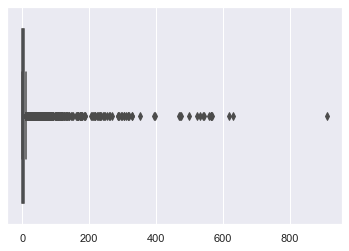

In [35]:
sns.boxplot(tmp) # 'bad distribution'

##### 2) List rare tokens

In [36]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [37]:
len(list_unique_words)

2114

In [38]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [39]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv(output_path + "unique_words.csv", index=False)

In [40]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:30]

pokizo                2
knows                 2
deluxe                2
prestige              2
birds                 2
thus                  2
styles                2
880                   2
dean                  2
stage                 2
plus                  2
neckspecifications    2
welcomed              2
milton                2
camerii               2
zipper                2
hourglass             2
pressure              2
bib                   2
850                   2
dat                   2
neckerchew            2
chompers              2
v220w                 2
fashionin             2
velcro                2
cheeky                2
bsf                   2
hilton                2
superb                2
dtype: int64

In [41]:
len(list_max_2_words)

3446

In [42]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv(output_path + "max_2_words.csv", index=False)

In [43]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:30]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
fb           5
beach        5
moist        5
995          5
attention    5
vatika       5
strip        5
intel        5
across       5
colored      5
styling      5
appealing    5
polishes     5
serving      5
winter       5
lace         5
loves        5
320          5
fluffy       5
straps       5
dtype: int64

In [44]:
len(list_max_5_words)

4677

In [45]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv(output_path + "max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [46]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['elegance', 'curtain', 'door', 'interiors', 'cm', 'height', '899', '213', 'key', 'rs', 'floral', 'multicolor', 'abstract', '2', 'eyelet', 'look', 'price', 'pack', 'polyester', 'features', 'enhances']


In [47]:
len(set(corpus))

6165

In [48]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['elegance', 'curtain', 'door', 'interiors', 'high', 'height', 'key', 'floral', 'multicolor', 'abstract', 'made', 'quality', 'eyelet', 'look', 'price', 'pack', 'polyester', 'features', 'enhances']


In [49]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [50]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

45225      packag
42533         get
47006    showpiec
35672      nutcas
16739         com
6717        brass
43713       everi
30109         bag
50770         use
37747       orang
33323      origin
22208     content
7121         ship
42567       paper
8602          one
5104        width
26075        cash
4211          pvc
50046     content
34601    flipkart
12246       decor
1323          buy
31546        pack
21208       light
46284         fit
22453       print
11547      detail
41436        hand
46132        hall
27848        sale
dtype: object

In [51]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['curtain', 'door', 'high', 'height', 'interior', 'key', 'eleg', 'floral', 'multicolor', 'abstract', 'featur', 'enhanc', 'made', 'eyelet', 'polyest', 'look', 'price', 'pack', 'qualiti']


In [52]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

47725             baby
15450              men
27543              day
25157           laptop
50776    alternatively
16422          general
35689          sticker
9238             great
19067              led
43287             pink
37888             keep
39947             home
41503             hand
1018          coloured
14540        beautiful
7116           product
17604           berlin
9041         microwave
16407           sleeve
29029            aapno
25667         shipping
530              sheet
47504              mug
39513              usb
18614             cash
10536              red
14505         jharokha
7320               mug
43339             glow
10132          gifting
dtype: object

In [53]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['elegance', 'curtain', 'door', 'high', 'height', 'interior', 'key', 'floral', 'multicolor', 'abstract', 'made', 'quality', 'eyelet', 'look', 'price', 'pack', 'polyester', 'enhances', 'feature']


##### 5) Only english words

In [54]:
pd.Series(words.words()).sample(30)

13133              Argynnis
29616             caneology
105601          lenticulate
171375            rubbishly
63827          epitendineum
168931               revile
90591              ichoglan
65206             ethnology
216765           unforgiven
128861            oakenshaw
9777       anthroposophical
110578           malfortune
126479            nonintent
32977                cerous
109127            lutescent
50010     deflectionization
109574           machopolyp
60330       electroethereal
227013          vaporizable
45886            Crossosoma
35673           chromatical
34408                 Chian
50461              delphine
128529         nullificator
227327           vauntingly
121427              mycotic
189285             stepdame
6853               ammonion
183971             snippish
81378        Gyrodactylidae
dtype: object

In [55]:
len(set(words.words()))

235892

In [56]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [57]:
len(set(eng_words))

234377

In [58]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['abaciscu', 'aani', 'aa', 'abacin', 'ababua', 'aaru', 'abacist', 'abac', 'aal', 'aardvark', 'aam', 'aaron', 'aaronit', 'ababdeh', 'aback', 'abacay', 'aalii', 'aardwolf', 'aba', 'abaca', 'ab', 'abactin', 'a']


In [59]:
len(set(eng_words_stem))

178311

In [60]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['aani', 'aa', 'ababua', 'aaru', 'abacist', 'abac', 'abacate', 'aal', 'abacination', 'aaronical', 'aardvark', 'abacinate', 'aam', 'aaron', 'abactinally', 'aaronitic', 'aaronic', 'ababdeh', 'aaronite', 'aback', 'aalii', 'abacay', 'aardwolf', 'aba', 'abaca', 'ab', 'abaciscus', 'abactinal', 'a']


In [61]:
len(set(eng_words_lem))

233450

In [62]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words, eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['curtain', 'door', 'high', 'height', 'interior', 'key', 'eleg', 'floral', 'multicolor', 'abstract', 'featur', 'enhanc', 'made', 'eyelet', 'polyest', 'look', 'price', 'pack', 'qualiti']


In [63]:
len(set(corpus))

2166

In [64]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words, eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

951        discount
40403         press
30233     corporate
17071       charger
16331     guarantee
35071          cash
30048         table
43051    multicolor
17741          part
19582     condition
2005           size
36480        single
38107       blanket
12140       product
32113           day
35330          cash
8123            mug
20231     condition
31501         style
38274          free
20033          pant
23708      shipping
35193       cushion
44421          wall
709         quality
24080          gift
39733        double
18597       battery
12839          best
10593       antique
dtype: object

In [65]:
len(set(corpus_lem))

2333

In [66]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [67]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [68]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [69]:
##sns.barplot(x=tmp.index, y=tmp.values)

##### 6) Wordcloud

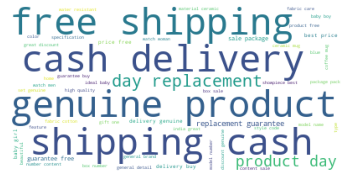

In [70]:
display_wordcloud([corpus_lem])

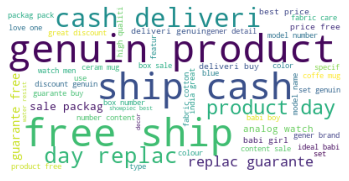

In [71]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [72]:
for i in range(7):
    globals()["df_" + str(i)] = data_text[data_text.target == i]

In [73]:
df_0.head()

,text,category,target
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [74]:
df_6.head()

,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [75]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [76]:
corpus_0[:1000]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product

In [77]:
len(corpus_0)

72541

In [78]:
len(corpus_6)

49083

##### 2) Process all of them

In [79]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
['c', 'h', 'f', 'S', 'n', 'i', 'C', ' ', 't', 'o', 'y', 's', 'p', 'e', 'a']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['f', 'H', 'u', ' ', 't', 'e', 'B', 'y', 'o', 's', 'r', 'K', 'F', 'a']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['0', '3', 'o', 's', '-', 'L', 'i', 'u', 'D', 'r', 'K', 'P', 'A', 'f', '1', '2', ' ', 't', 'k', 'e', 'y', 'F', 'n', 'a']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['B', 'o', 's', 'L', 'i', 'u', 'r', 'P', 'm', ' ', 't', 'e', 'C', 'c', 'M', 'y', 'q', 'n', 'a']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['c', 'f', 'n', 'u', ' ', 't', 'e', 'P', 'y', 'o', 's', 'r', 'K', 'g', 'E', 'F', 'l', 'a']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [80]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                          rejoin=False,
                          list_rare_words=list_unique_words,
                          eng_words=eng_words_stem)

In [81]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['self', 'specif', 'materi', 'design', 'towel', 'washabl', 'blue', 'machin', 'red', 'featur', 'name', 'gener', 'brand', 'type', 'model', 'cotton', 'yellow', 'bath', 'ye']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['condit', 'damag', 'dri', 'girl', 'burt', 'specif', 'repair', 'key', 'condition', 'appli', 'featur', 'hair', 'shea', 'type', 'boy', 'ideal', 'deep', 'grapefruit', 'bee']


__A

In [82]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

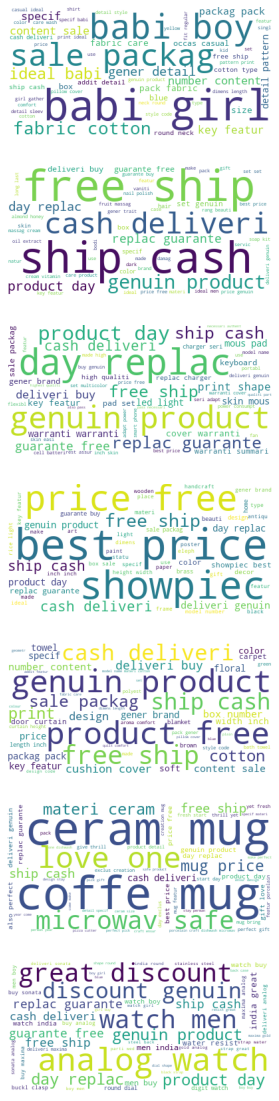

In [83]:
display_wordcloud(corpus_list)

In [84]:
pd.Series(corpus_0).value_counts().head(20)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
gener      96
featur     88
packag     88
sleev      86
type       85
sale       85
color      83
wash       80
neck       80
number     76
dtype: int64

In [85]:
pd.Series(corpus_6).value_counts().head(20)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
guarante    134
genuin      134
discount    134
great       134
india       134
buy         134
dial         90
strap        79
boy          67
resist       55
dtype: int64

##### Duplicated words in all of the 7 categories

In [86]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

[]

In [87]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [88]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif',
 'ideal',
 'gener',
 'featur',
 'type',
 'color',
 'pack',
 'price',
 'box',
 'product',
 'set']

In [89]:
test = generate_duplicated_words_list(corpus_list, n=20)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 130
The length of the set of duplicated words is 26


In [90]:
duplicated_words_set = generate_duplicated_words_list(corpus_list, n=30)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 203
The length of the set of duplicated words is 38


In [116]:
duplicated_words_set

['packag',
 'day',
 'free',
 'skin',
 'girl',
 'product',
 'deliveri',
 'specif',
 'number',
 'beauti',
 'materi',
 'design',
 'ship',
 'sale',
 'color',
 'box',
 'light',
 'set',
 'featur',
 'genuin',
 'gener',
 'guarante',
 'type',
 'brand',
 'cover',
 'print',
 'boy',
 'gift',
 'cotton',
 'price',
 'buy',
 'inch',
 'pack',
 'qualiti',
 'ideal',
 'best',
 'cash',
 'replac']

#### Final cleaning

##### 1) cleaning per document

In [91]:
#data["clean_text"] = data.text.apply(final_clean)
#df = data.copy()
#df["clean_text"] = df.text.parallel_apply(final_clean)

In [92]:
data_text["clean_text"] = data_text.text.apply(lambda x: final_clean(x, process_text_5, "stem", list_unique_words, eng_words_stem, duplicated_words_set))

In [93]:
data_text.sample(20)

,text,category,target,clean_text
811,Buy Raymond Abstract Double Blanket Pink at Rs...,Home Furnishing,4,raymond abstract doubl blanket pink
462,Key Features of Amit Carpet Polyester Medium D...,Home Furnishing,4,key carpet polyest medium door mat anti slip b...
457,Buy SRP Linen Cotton Plain King sized Double B...,Home Furnishing,4,linen plain king size doubl
66,Specifications of CHHOTE JANAB COZY MATTRESS P...,Baby Care,0,cozi mattress protector babi mattress waterpro...
371,Buy Netgear JWNR2010 N300 Wireless Router only...,Computers,2,wireless router
39,Key Features of JMD Printed Cushions Cover Pri...,Home Furnishing,4,key cushion size made cushion multicolor suita...
634,Key Features of Wow! Baby Girl's Gathered Pink...,Baby Care,0,key wow babi gather pink dress summer frock so...
845,Feetje Trousers - Buy Blue Feetje Trousers For...,Baby Care,0,trouser blue trouser india shop apparel huge c...
49,Key Features of Suave Naturals Everlasting Sun...,Beauty and Personal Care,1,key suav natur everlast sunshin condition appl...
1041,Buy Wallmantra Extra Large Vinyl Stickers Stic...,Baby Care,0,extra larg vinyl sticker sticker extra larg vi...


In [94]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["text"], end="\n\n")
    print("__After__")
    print(series["clean_text"], end="\n\n\n")
    print()

__Before__
Buy Offspring Printed Single Wrapper Multicolor at Rs. 290 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!

__After__
offspr singl wrapper multicolor



__Before__
Key Features of MKB Baby Girl's Empire Waist Dress Material: 100% Cotton Yellow Flower Print Length: 26 Inches,MKB Baby Girl's Empire Waist Dress Price: Rs. 585 This Yellow Color Flower printed baby girl's clothing set is made of 100% Cotton material. It's very attractive and comfortable, perfect as a ceremony wear Baby Girls beautiful dress for a little angel,Specifications of MKB Baby Girl's Empire Waist Dress In The Box 1 Dress Dimensions Length Midi/Knee Length General Details Pattern Printed Occasion Casual Ideal For Baby Girl's Dress Details Lining 100% Cotton Sleeve Sleeveless Number of Contents in Sales Package Pack of 1 Fabric 100% Cotton Type Empire Waist Fabric Care Gentle Hand Wash. Do not bleach.

__After__
key babi empir waist dress yellow flower length babi empir waist dress

In [95]:
# check no missing values
data_text.isna().mean()

text          0.0
category      0.0
target        0.0
clean_text    0.0
dtype: float64

In [96]:
# save
data_text.to_csv(output_path + "final_data_text.csv", index=False)

##### 2) cleaning corpus (per category) (like above)

In [97]:
for i in range(7):
    globals()["df_clean_" + str(i)] = data_text[data_text.target == i]

In [98]:
df_clean_0.head()

,text,category,target,clean_text
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,bath towel bath towel red yellow blue bath tow...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key terri face towel size small height terri f...
40,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key kid babi green top pyjama fabric green kid...
42,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key kid babi blue grey top pyjama fabric blue ...
63,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0,key kohl wine bag yellow easi carri bit kohl w...


In [99]:
for i in range(7):
    globals()["corpus_clean_" + str(i)] = " ".join(globals()["df_clean_" + str(i)].clean_text)

for i in range(7):
    globals()["corpus_clean_" + str(i)] = process_text_5(globals()["corpus_clean_" + str(i)],
                                                   rejoin=False,
                                                         lem_or_stem="stem",
                                                   list_rare_words=list_unique_words,
                                                   eng_words=eng_words_stem,
                                                    extra_words=duplicated_words_set)

In [100]:
corpus_clean_list = [globals()["corpus_clean_" + str(i)] for i in range(7)]

In [111]:
corpus_clean_0[:1000]

['bath',
 'towel',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'machin',
 'washabl',
 'self',
 'bath',
 'towel',
 'model',
 'name',
 'bath',
 'towel',
 'men',
 'model',
 'red',
 'yellow',
 'blue',
 'size',
 'length',
 'width',
 'content',
 'bath',
 'towel',
 'key',
 'terri',
 'face',
 'towel',
 'size',
 'small',
 'height',
 'terri',
 'face',
 'towel',
 'piec',
 'face',
 'towel',
 'assort',
 'bring',
 'soft',
 'towel',
 'export',
 'soft',
 'textur',
 'care',
 'give',
 'feel',
 'export',
 'bath',
 'towel',
 'last',
 'year',
 'famou',
 'fine',
 'absorb',
 'soft',
 'durabl',
 'note',
 'shrinkag',
 'may',
 'vari',
 'pictur',
 'size',
 'may',
 'vari',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bleach',
 'flat',
 'dri',
 'wash',
 'first',
 'use',
 'size',
 'face',
 'towel',
 'terri',
 'face',
 'towel',
 'piec',
 'face',
 'towel',
 'assort',
 'bath',
 'towel',
 'terri',
 'face',
 'towel',
 'model',
 'name',
 'men',
 'model',
 'size',
 'small',
 'assort',
 '

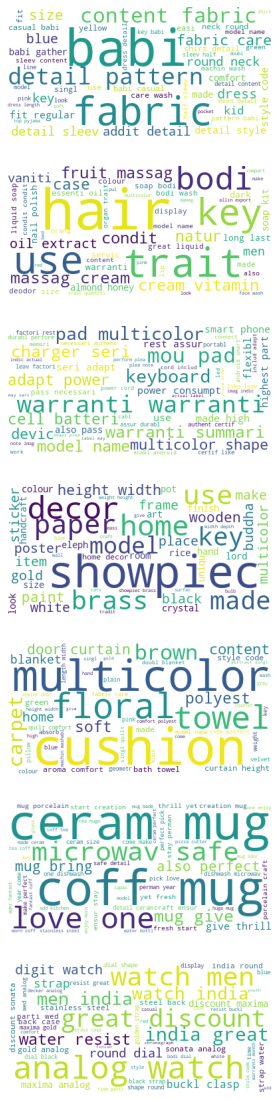

In [102]:
display_wordcloud(corpus_clean_list)

### II) Transformations

In [103]:
data = pd.read_csv(output_path + "final_data_text.csv")

In [108]:
data

,text,category,target,clean_text
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key eleg polyest multicolor abstract eyelet do...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,bath towel bath towel red yellow blue bath tow...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key terri face towel size small height terri f...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key royal fashion king size doubl royal wed ro...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key floral king size doubl floral king size do...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker doubl stic...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker bring home exclus p...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...


#### 1) Bag of Words

In [104]:
# 1) texte / 2) images (paralleles can do)
# 1 vocab pour chaque doc

# texte :
# nettoyage du texte / normalisation (pré ttt cf notebook)
# bag of words
# reduction dimension tSNE ici
# 7 clusters
# ARI score : sur la valeur à obtenir 0.4/0.5 (0.6 ou 0.7)
# objectifs : cours OC x2 + webinair / Youtube
# vendredi

## Part II : Dimension Reduction

In [105]:
# pour le texte : permet de visualiser en 2D ACP / tSNE


## Part III : Clustering

In [107]:
print(1)

1


In [106]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 659.564056 sec
computing time : 00:10:59
